# Project: Marriage age dynamics in Russia
### Questions
What is the distribution between the age of marriage for women and men in Russia? <br>
How does it changed through years (starting from 1992 till 2020)?<br>
Are there any differences with the current marriage distribution in developed European countries (Denmark is taken)?
### Sources
1) The official govermental statistics: https://rosstat.gov.ru/storage/mediabank/SYbkRQg9/demo33.xls (from here https://rosstat.gov.ru/folder/12781)<br>
2) Eurostat (https://ec.europa.eu/eurostat/databrowser/view/DEMO_NSINAGEC__custom_1876876/default/table?lang=en)

==================

In [221]:
import pandas as pd
import numpy as np
from datetime import datetime

data = pd.read_excel('marrige_age.xls', skiprows=6, skipfooter=1)

# rename columns to English
column_names_mapper = {'Unnamed: 0': 'year',
                      'браков': 'total number of marriages',
                      'до 18': 'M 0-18',
                      '18-24': 'M 18-24',
                      '25-34': 'M 25-34',
                      '35 и более': 'M 35+', 
                      'не указан': 'M not specified',
                      'до 18.1': 'W 0-18',
                      '18-24.1': 'W 18-24',
                      '25-34.1': 'W 25-34',
                      '35 и более.1': 'W 35+', 
                      'не указан.1': 'W not specified'}

data = data.rename(columns=column_names_mapper)
data['year'] = data['year'].apply(lambda x: str(x)[0:4])

#remove data older than 1992 (only data for Russian Federation, not USSR, will be used)
data = data.astype(int)
data = data[data['year']>1991].reset_index(drop=True)

data.head()

,year,total number of marriages,M 0-18,M 18-24,M 25-34,M 35+,M not specified,W 0-18,W 18-24,W 25-34,W 35+,W not specified
0,1992,1053717,10611,561052,288860,193113,81,72697,615119,197645,168177,79
1,1993,1106723,9837,605349,295350,196116,71,75936,660105,200753,169863,66
2,1994,1080600,8844,578305,293623,199774,54,69237,638631,200070,172605,57
3,1995,1075219,8044,555859,303953,207319,44,63633,628329,205549,177655,53
4,1996,866651,6167,430853,254362,175246,23,47481,500163,170058,148921,28


In [222]:
# Normalize Denmark-data 
data_dk_no = pd.read_csv('demo_nsinagec__custom_1876876_linear (1).csv') #, skiprows=6, skipfooter=1)
data_dk = data_dk_no[data_dk_no['geo']=='DK']
data_dk = data_dk[['sex', 'age', 'TIME_PERIOD', 'OBS_VALUE']]
data_dk['OBS_VALUE'] = data_dk['OBS_VALUE'].astype(int)

cols_less_18 = ['Y10-14', 'Y15', 'Y16','Y17']
cols_18_24 = ['Y18', 'Y19', 'Y20-24']
cols_25_34 = ['Y25-29', 'Y30-34']
cols_35_more = ['Y35-39', 'Y40-44', 'Y45-49', 'Y50-54', 'Y55-59', 'Y60-64', 'Y65-69', 'Y70-74', 'Y75-79', 'Y_GE80']
cols_unknown = ['UNK']
cols_total = ['TOTAL']

data_dk_norm = pd.DataFrame(columns=['year', 'M total number of marriages', 'W total number of marriages', 
                                     'M 0-18','M 18-24', 'M 25-34', 'M 35+', 'M not specified',
                                     'W 0-18','W 18-24', 'W 25-34', 'W 35+', 'W not specified'])

data_dk_norm[['year','M total number of marriages']] = data_dk[(data_dk['age']=='TOTAL')&(data_dk['sex']=='M')].groupby('TIME_PERIOD').sum().reset_index()[['TIME_PERIOD', 'OBS_VALUE']]  
data_dk_norm['W total number of marriages'] = data_dk[(data_dk['age']=='TOTAL')&(data_dk['sex']=='F')].groupby('TIME_PERIOD').sum().reset_index()[ 'OBS_VALUE']  
data_dk_norm['M 0-18'] = data_dk[(data_dk['age'].isin(cols_less_18)) & (data_dk['sex']=='M')].groupby('TIME_PERIOD').sum().reset_index()['OBS_VALUE']
data_dk_norm['W 0-18'] = data_dk[(data_dk['age'].isin(cols_less_18)) & (data_dk['sex']=='F')].groupby('TIME_PERIOD').sum().reset_index()['OBS_VALUE']
data_dk_norm['M 18-24'] = data_dk[(data_dk['age'].isin(cols_18_24)) & (data_dk['sex']=='M')].groupby('TIME_PERIOD').sum().reset_index()['OBS_VALUE']
data_dk_norm['W 18-24'] = data_dk[(data_dk['age'].isin(cols_18_24)) & (data_dk['sex']=='F')].groupby('TIME_PERIOD').sum().reset_index()['OBS_VALUE']
data_dk_norm['M 25-34'] = data_dk[(data_dk['age'].isin(cols_25_34)) & (data_dk['sex']=='M')].groupby('TIME_PERIOD').sum().reset_index()['OBS_VALUE']
data_dk_norm['W 25-34'] = data_dk[(data_dk['age'].isin(cols_25_34)) & (data_dk['sex']=='F')].groupby('TIME_PERIOD').sum().reset_index()['OBS_VALUE']
data_dk_norm['M 35+'] = data_dk[(data_dk['age'].isin(cols_35_more)) & (data_dk['sex']=='M')].groupby('TIME_PERIOD').sum().reset_index()['OBS_VALUE']
data_dk_norm['W 35+'] = data_dk[(data_dk['age'].isin(cols_35_more)) & (data_dk['sex']=='F')].groupby('TIME_PERIOD').sum().reset_index()['OBS_VALUE']
data_dk_norm['M not specified'] = data_dk[(data_dk['age'].isin(cols_unknown)) & (data_dk['sex']=='M')].groupby('TIME_PERIOD').sum().reset_index()['OBS_VALUE']
data_dk_norm['W not specified'] = data_dk[(data_dk['age'].isin(cols_unknown)) & (data_dk['sex']=='F')].groupby('TIME_PERIOD').sum().reset_index()['OBS_VALUE']


data_dk_norm = data_dk_norm.astype(int)
data_dk_norm.head()

,year,M total number of marriages,W total number of marriages,M 0-18,M 18-24,M 25-34,M 35+,M not specified,W 0-18,W 18-24,W 25-34,W 35+,W not specified
0,1992,23537,23601,2,2870,16240,4353,0,83,6229,14983,2265,0
1,1993,22939,23105,3,2483,15645,4724,0,72,5496,14808,2695,0
2,1994,25845,25886,3,2476,17455,5820,0,67,5493,16846,3427,0
3,1995,25359,25302,4,2347,17134,5799,0,73,5271,16465,3461,0
4,1996,26530,26267,3,1776,17892,6772,0,45,4394,17664,4128,0


In [223]:
# check that sums in statistics are ok
def check_stat_sums(data):
    data['M Total'] = data[['M 0-18','M 18-24', 'M 25-34', 'M 35+', 'M not specified']].sum(axis=1)
    data['W Total'] = data[['W 0-18','W 18-24', 'W 25-34', 'W 35+', 'W not specified']].sum(axis=1)
    m_stat = data['M Total'] == data['M total number of marriages'] #data['total number of marriages']
    w_stat = data['W Total'] == data['W total number of marriages'] #data['total number of marriages']
    return m_stat |  w_stat  #data[['M Total', 'M total number of marriages', 'W Total', 'W total number of marriages']] #

#check_stat_sums(data_dk_norm)

## Denmark data has different number of total marriages for men and women, and the sum doesn't match (small difference)
## Russian data is ok

In [224]:
#convert marriage number to percentages
columns = ['M 0-18','M 18-24', 'M 25-34', 'M 35+', 'M not specified',
          'W 0-18','W 18-24', 'W 25-34', 'W 35+', 'W not specified']

for col in columns:
    data[col] = data[col]/data['total number of marriages']  *100
    if col[0] == 'M':
        data_dk_norm[col] = data_dk_norm[col]/data_dk_norm['M total number of marriages']  *100
    elif col[0] == 'W':
        data_dk_norm[col] = data_dk_norm[col]/data_dk_norm['W total number of marriages']  *100

    
#data_dk_norm.head()

In [225]:
%matplotlib notebook

In [226]:
import matplotlib.animation as animation

n = len(data['year'])

# function does the plotting
def update_graph(curr):
    print(curr)
    
    if curr == n: 
        a.event_source.stop()
        
    # data to show
    data_year = data.iloc[curr]
    data_year_men = list(data_year[['M 0-18','M 18-24', 'M 25-34', 'M 35+']].values)
    print(data_year_men)
    data_year_women = list(data_year[['W 0-18','W 18-24', 'W 25-34', 'W 35+']].values)

    axs.cla()
    
    y_vals = np.array([0,1,2,3])
    plt.bar(y_vals-0.2, data_year_men, width=0.45, color='#7799F0', alpha=0.7, label='men')
    plt.bar(y_vals+0.2, data_year_women, width=0.45, color='#FF5555',alpha=0.7, label='women')
    
    axs.set_xlim(-0.5, 3.7)
    axs.set_ylim(0, 60)
    axs.set_xticks(y_vals)
    axs.set_xticklabels(['< 18', '18-24', '25-34', '35+'])  #([0, 1, 2, 3], 
    axs.set_title('Russia, year {}'.format(data['year'][curr]),  fontdict = {'fontsize' : 10})
#    axs.legend(loc='upper left', bbox_to_anchor=(-0.15,1), fontsize=8)
    
#   axs.annotate('n = {}'.format(curr), [2,57])

<IPython.core.display.Javascript object>


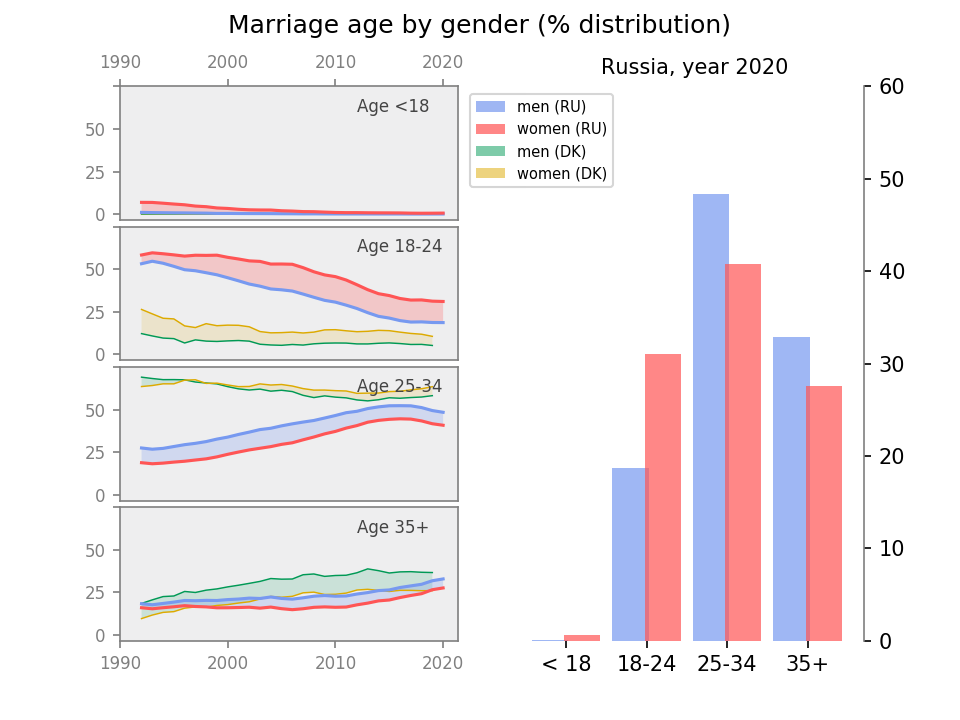

In [239]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch


my_fig = plt.figure()
axs = plt.subplot(1, 2, 2) 
axs.yaxis.tick_right()


ax1 = plt.subplot(4, 2, 1, label='< 18')
ax1.xaxis.tick_top()
ax1.set_ylim(0, 70)
ax2 = plt.subplot(4, 2, 3, sharey=ax1)
ax3 = plt.subplot(4, 2, 5, sharey=ax1)
ax4 = plt.subplot(4, 2, 7, sharey=ax1)

my_colors = {'c_men_rus': '#7799F0', 
             'c_women_rus': '#FF5555',
             'c_men_dk': '#009955',
             'c_women_dk': '#DDAA00'
            }

# plot Denmark info
dk_line = 0.7
ax1.plot(data_dk_norm['year'], data_dk_norm['M 0-18'], my_colors['c_men_dk'], \
         data_dk_norm['year'], data_dk_norm['W 0-18'], my_colors['c_women_dk'], linewidth=dk_line)
ax2.plot(data_dk_norm['year'], data_dk_norm['M 18-24'], my_colors['c_men_dk'], \
         data_dk_norm['year'], data_dk_norm['W 18-24'], my_colors['c_women_dk'], linewidth=dk_line)
ax3.plot(data_dk_norm['year'], data_dk_norm['M 25-34'], my_colors['c_men_dk'], \
         data_dk_norm['year'], data_dk_norm['W 25-34'], my_colors['c_women_dk'], linewidth=dk_line)
ax4.plot(data_dk_norm['year'], data_dk_norm['M 35+'], my_colors['c_men_dk'], \
         data_dk_norm['year'], data_dk_norm['W 35+'], my_colors['c_women_dk'], linewidth=dk_line)

ax1.fill_between(data_dk_norm['year'], data_dk_norm['M 0-18'], y2=data_dk_norm['W 0-18'], facecolor=my_colors['c_women_dk'], alpha=0.15)
ax2.fill_between(data_dk_norm['year'], data_dk_norm['M 18-24'], data_dk_norm['W 18-24'], facecolor=my_colors['c_women_dk'], alpha=0.15)
y1, y2 = data_dk_norm['M 25-34'], data_dk_norm['W 25-34']
ax3.fill_between(data_dk_norm['year'], y1, y2, where=y2>y1, facecolor=my_colors['c_women_dk'], alpha=0.15)
ax3.fill_between(data_dk_norm['year'], y1, y2, where=y2<y1, facecolor=my_colors['c_men_dk'], alpha=0.15)
ax4.fill_between(data_dk_norm['year'], data_dk_norm['M 35+'], data_dk_norm['W 35+'], facecolor=my_colors['c_men_dk'], alpha=0.15)


# plot Russia info
ax1.plot(data['year'], data['M 0-18'], my_colors['c_men_rus'], data['year'], data['W 0-18'], my_colors['c_women_rus'])
ax2.plot(data['year'], data['M 18-24'], my_colors['c_men_rus'], data['year'], data['W 18-24'], my_colors['c_women_rus'])
ax3.plot(data['year'], data['M 25-34'], my_colors['c_men_rus'], data['year'], data['W 25-34'], my_colors['c_women_rus'])
ax4.plot(data['year'], data['M 35+'], my_colors['c_men_rus'], data['year'], data['W 35+'], my_colors['c_women_rus'])


ax1.fill_between(data['year'], data['M 0-18'], data['W 0-18'], facecolor=my_colors['c_women_rus'], alpha=0.25)
ax2.fill_between(data['year'], data['M 18-24'], data['W 18-24'], facecolor=my_colors['c_women_rus'], alpha=0.25)
ax3.fill_between(data['year'], data['M 25-34'], data['W 25-34'], facecolor=my_colors['c_men_rus'], alpha=0.25)
ax4.fill_between(data['year'], data['M 35+'], data['W 35+'], facecolor=my_colors['c_men_rus'], alpha=0.25)

graph_names = ['<18', '18-24', '25-34', '35+']


#r Remove extra spines to avoid too many lines
for ax, name in zip((ax1, ax2, ax3, ax4), graph_names):
    plt_spines = list(ax.spines.values())
    plt_spines[3].set_edgecolor('gray')
    plt_spines[1].set_edgecolor('gray')
    plt_spines[2].set_edgecolor('gray')
    plt_spines[0].set_edgecolor('gray')
    ax.set_facecolor('#eeeeef')
    
    ax.set_xticks([1990, 2000, 2010, 2020])
    ax.set_yticks([0, 25, 50, 75])
    ax.set_yticklabels(['0', '25', '50', ''])
    ax.tick_params(colors='gray', labelsize=8)
    #ax.set_xticklabels(['1990', '', '25-34', '35+'])  #([0, 1, 2, 3], 
    ax.annotate('Age {}'.format(name), [2012,60], color='#444444', fontsize=8)

ax2.xaxis.set_ticks([])
ax3.xaxis.set_ticks([])

# set legend
ru_m =  Patch(facecolor=my_colors['c_men_rus'], alpha=0.7)  #  label='Color Patch')]
ru_w =  Patch(facecolor=my_colors['c_women_rus'], alpha=0.7)
dk_m =  Patch(facecolor=my_colors['c_men_dk'], alpha=0.5)
dk_w =  Patch(facecolor=my_colors['c_women_dk'], alpha=0.5)
ax1.legend(handles=[ru_m, ru_w, dk_m, dk_w], labels=['men (RU)', 'women (RU)', 'men (DK)', 'women (DK)'], \
           loc='upper right', bbox_to_anchor=(1.48, 1), fontsize=7)    

plt.subplots_adjust(wspace=0.2, hspace=0.05)

# Remove extra spines
my_fig = plt.gcf()
axs = plt.subplot(1, 2, 2) 
plt_spines = list(axs.spines.values())
plt_spines[3].set_visible(False)
plt_spines[1].set_edgecolor('gray')
plt_spines[2].set_visible(False)
plt_spines[0].set_visible(False)


# Bars for 1992 as a default bars
data_year = data.iloc[0]
data_year_men = list(data_year[['M 0-18','M 18-24', 'M 25-34', 'M 35+']].values)
data_year_women = list(data_year[['W 0-18','W 18-24', 'W 25-34', 'W 35+']].values)
y_vals = np.array([0,1,2,3])
plt.bar(y_vals-0.2, data_year_men, width=0.45, color='#7799F0', alpha=0.7, label='men')
plt.bar(y_vals+0.2, data_year_women, width=0.45, color='#FF5555',alpha=0.7, label='women')
    
axs.set_xlim(-0.5, 3.7)
axs.set_ylim(0, 60)
axs.set_xticks(y_vals)
axs.set_xticklabels(['< 18', '18-24', '25-34', '35+'])  #([0, 1, 2, 3], 
my_fig.suptitle('Marriage age by gender (% distribution)\n\n\n', fontdict = {'fontsize' : 12})
axs.set_title('Russia, year {}'.format(data['year'][0]),  fontdict = {'fontsize' : 10})


#axs.legend(loc='upper left', bbox_to_anchor=(-0.15,1), fontsize=8)
my_fig.set_facecolor('white')

# Animation
a = animation.FuncAnimation(my_fig, update_graph, interval=200)


In [238]:
## save image
#my_fig.savefig("Marriage_age_Russia.png")

## save video
#writervideo = animation.FFMpegWriter(fps=4)
#a.save('Marriage_age_Russia.mp4', writer=writervideo)

0
[1.007006625118509, 53.245036380735996, 27.413432638934367, 18.326837281736939]
0
[1.007006625118509, 53.245036380735996, 27.413432638934367, 18.326837281736939]
1
[0.88884029698488243, 54.697426546660729, 26.68689455265681, 17.720423267610773]
2
[0.81843420322043303, 53.517027577271882, 27.172219137516194, 18.48732185822691]
3
[0.74812666070819056, 51.697282135081323, 28.268938699929969, 19.281560314689379]
4
[0.71158978643075466, 49.714706381230741, 29.349992096010968, 20.221057842199457]
5
[0.63614067476580949, 49.118870844916742, 30.137514527509907, 20.091425026200678]
6
[0.57158612498541872, 47.95172801408286, 31.165288662186825, 20.295961663314447]
7
[0.41408662784444483, 46.738560212124739, 32.62603137532075, 20.210237037980075]
8
[0.41267007456590515, 45.006001156768939, 33.791026013928033, 20.743051306825716]
9
[0.35703267507929898, 43.207942579241589, 35.349629438821708, 21.05903718990524]
10
[0.32517391312874966, 41.311894343974373, 36.725530074664483, 21.617495062573425]


IndexError: single positional indexer is out-of-bounds